In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

(1000, 8)


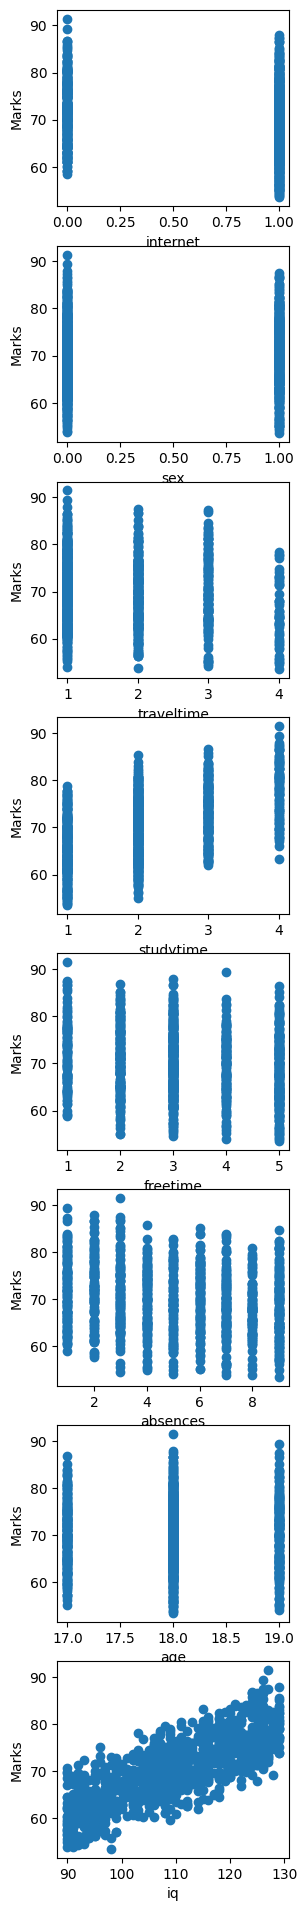

In [4]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx', engine='openpyxl')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
x_features = ['internet', 'sex', 'traveltime', 'studytime', 'freetime', 'absences', 'age', 'iq', 'marks']
# Add some features if required in x_train
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):

  mapping = {'M' : 0, 'F': 1, 'no': 0, 'yes': 1}
  for i in range(x_train.shape[0]):
      x_train[i][0] = mapping[x_train[i][0]]
      x_train[i][1] = mapping[x_train[i][1]]
  
  return x_train

x_train = feature_changing(x_train)
print(x_train.shape)

fix, axes = plt.subplots(x_train.shape[1], 1, figsize=(3, x_train.shape[1] * 3))
for i in range(x_train.shape[1]):
  axes[i].scatter(x_train[:, i], y_train)
  axes[i].set_xlabel(x_features[i])
  axes[i].set_ylabel("Marks")


In [5]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    # Your code here
  # ---------
  x_std = np.std(x_train, axis=0, dtype=np.float64)
  x_mean = np.mean(x_train, axis=0)
  

  return x_train,x_std,x_mean

In [12]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
  # ---------
  m = x_train.shape[0]
  f_wb = np.dot(x_train, w) + b
  cost = (f_wb - y_train)**2
  loss = (1/(2*m))*sum(cost)  

  return loss[0]

In [17]:
def gradient_descent(x_train,y_train,w,b):

  def grad(x_train, y_train, w, b):
    m, n = x_train.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range(m):                             
        err = (np.dot(x_train[i], w) + b) - y_train[i]   
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + (err * x_train[i, j])[0]    
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw
  # ---------
    # Your code here
    # Choose learning rate yourself
  # ---------
  
  num_iters = 1000
  lr = 10

  for i in range(num_iters):
    dj_db, dj_dw = grad(x_train, y_train, w, b)
    
    w = w - lr * dj_dw
    b = b - lr * dj_db

  return w,b

In [18]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

C:\Users\ARYAN KUMAR\AppData\Local\Temp\ipykernel_14140\2417462441.py:11: RuntimeWarning: overflow encountered in add
  dj_db = dj_db + err
C:\Users\ARYAN KUMAR\AppData\Local\Temp\ipykernel_14140\2417462441.py:10: RuntimeWarning: overflow encountered in scalar add
  dj_dw[j] = dj_dw[j] + (err * x_train[i, j])[0]
C:\Users\ARYAN KUMAR\AppData\Local\Temp\ipykernel_14140\2417462441.py:10: RuntimeWarning: overflow encountered in multiply
  dj_dw[j] = dj_dw[j] + (err * x_train[i, j])[0]
C:\Users\ARYAN KUMAR\AppData\Local\Temp\ipykernel_14140\2417462441.py:27: RuntimeWarning: invalid value encountered in subtract
  w = w - lr * dj_dw
C:\Users\ARYAN KUMAR\AppData\Local\Temp\ipykernel_14140\3571104405.py:23: RuntimeWarning: invalid value encountered in less
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [10]:
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

In [13]:
cost(x_train,y_train,w,b)

14905.192377619453